In [101]:
%matplotlib inline

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cv2

References:
* https://docs.opencv.org/4.x/dd/dd7/tutorial_morph_lines_detection.html

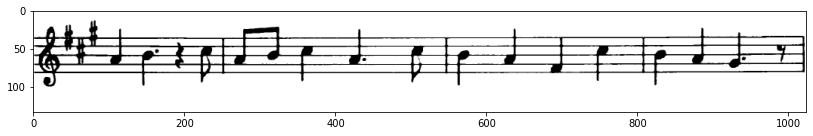

In [103]:
original_image = cv2.imread("data/music.png", cv2.IMREAD_COLOR)

# display image in notebook using original size (ref: https://stackoverflow.com/questions/60144693/show-image-in-its-original-resolution-in-jupyter-notebook)
dpi = matplotlib.rcParams['figure.dpi']
height, width, _ = original_image.shape
figsize = (width / float(dpi), height / float(dpi))
plt.figure(figsize=figsize)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))  # cv2 displays BGR rather than RGB, so we convert back before displaying image

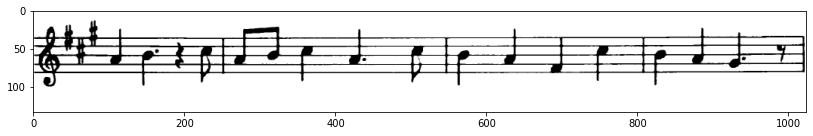

In [104]:
grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=figsize)
plt.imshow(cv2.cvtColor(grayscale_image, cv2.COLOR_BGR2RGB))

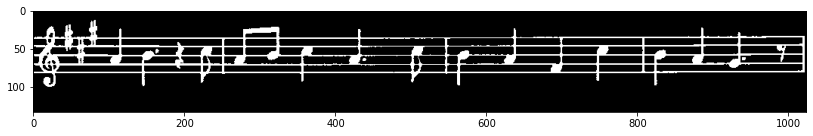

In [105]:
# TODO figure out what this does
gray = cv2.bitwise_not(grayscale_image)
black_white_image = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, -2)
plt.figure(figsize=figsize)
plt.imshow(cv2.cvtColor(black_white_image, cv2.COLOR_BGR2RGB))

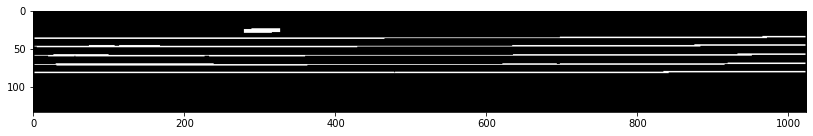

In [106]:
horizontal = np.copy(black_white_image)
horizontal_size = width // 30
horizontal_structure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))
# Apply morphology operations
horizontal = cv2.erode(horizontal, horizontal_structure)
horizontal = cv2.dilate(horizontal, horizontal_structure)
plt.figure(figsize=figsize)
plt.imshow(cv2.cvtColor(horizontal, cv2.COLOR_BGR2RGB))

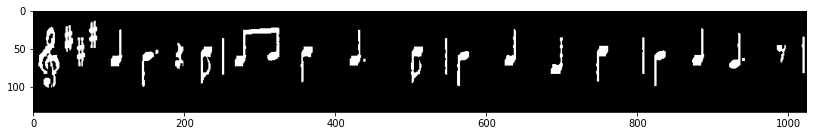

In [107]:
vertical = np.copy(black_white_image)
vertical_size = height // 30
vertical_structure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, vertical_size))
# Apply morphology operations
vertical = cv2.erode(vertical, vertical_structure)
vertical = cv2.dilate(vertical, vertical_structure)
plt.figure(figsize=figsize)
plt.imshow(cv2.cvtColor(vertical, cv2.COLOR_BGR2RGB))

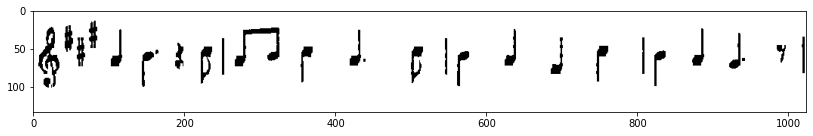

In [108]:
vertical = cv2.bitwise_not(vertical)
plt.figure(figsize=figsize)
plt.imshow(cv2.cvtColor(vertical, cv2.COLOR_BGR2RGB))

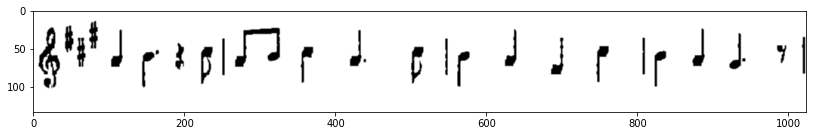

In [109]:
edges = cv2.adaptiveThreshold(vertical, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, -2)
kernel = np.ones((2, 2), np.uint8)
edges = cv2.dilate(edges, kernel)
smooth = np.copy(vertical)
smooth = cv2.blur(smooth, (2, 2))
(rows, cols) = np.where(edges != 0)
vertical[rows, cols] = smooth[rows, cols]
plt.figure(figsize=figsize)
plt.imshow(cv2.cvtColor(vertical, cv2.COLOR_BGR2RGB))